#### Imports

In [52]:
import mne
import os
import pandas
import numpy 

from IPython.display import clear_output

#### Load Metadata

Change 'originalPATH' to path where Metadata files are located (and 'excelPATH' to save location of excel files).

In [2]:
DataList = ["cdi", "children", "CODES_overview", "parents"]
MetaData = [None] * len(DataList)

MakeExcelFiles = True # Option to put .txt files into Excel files

for i, DataFile in enumerate(DataList):
    originalPATH = "D:\\EEG Data\\EEG New Dataset Additional Data\\" + DataFile + '.txt'    
    if os.path.exists(originalPATH):  
        MetaData[i] = pandas.read_table(originalPATH)

        if(MakeExcelFiles):
            excelPATH = './Excel Files\\' + DataFile + '.xlsx'
            if os.path.exists(excelPATH):
                os.remove(excelPATH)            
            MetaData[i].to_excel(excelPATH)
            
    else: print("PATH NOT FOUND:  " + originalPATH) 

## Puts Tables in seperate files:
cdi            = MetaData[DataList.index("cdi")]
children       = MetaData[DataList.index("children")]
parents        = MetaData[DataList.index("parents")]

CODES_overview = MetaData[DataList.index("CODES_overview")]
CODES_overview = CODES_overview.set_index("nrInPresentationScript") # Index is the Event ID
CODES_overview = CODES_overview[["condition", "stimulusType", "nrOfToken"]] # Only these columns needed

## UNCOMMENT TO SHOW (one at a time) (shortcut: ctrl+/): 
# cdi
# children
# parents
CODES_overview # CODES_overview[column = "condition", "stimulusType", "nrOfToken"][event ID]

,condition,stimulusType,nrOfToken
nrInPresentationScript,,,
1,giepMultiple,standard1,1
2,giepMultiple,standard1,2
3,giepMultiple,standard1,3
4,giepMultiple,standard1,4
5,giepMultiple,standard1,5
...,...,...,...
71,gopMultiple,deviant,11
72,gopMultiple,deviant,12
104,gopSingle,standard1,1


#### Load EEG files
Change path os.walk to parent of folder that contain .bdf files

In [11]:
EEG = []

EEG_filenames = []
EEG_filelocation = []

for root, dirs, files in os.walk("D:\\EEG Data\\EEG New Dataset\\"):
    for file in files:
        if file.endswith('.bdf') and len(file) == 8:
            BdfFile = mne.io.read_raw_bdf(root+'\\'+file)
            EEG.append(BdfFile)  
            
            EEG_filenames.append(file.replace(".bdf", ""))
            EEG_filelocation.append(root+'\\'+file)
            clear_output(wait=True)
            
print(len(EEG), "EEG files loaded")

119 EEG files loaded


#### Show EEG Info

In [4]:
index = 7
PrintEEGInfo = True
if(PrintEEGInfo):
    print('File Location: ',EEG_filelocation[index],'\n')
    print(EEG[index],'\n')
    print(EEG[index].info)

File Location:  D:\EEG Data\EEG New Dataset\104\104b\104b.bdf 

<RawEDF | 104b.bdf, 41 x 3794944 (1853.0 s), ~44 kB, data not loaded> 

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 40 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 417.0 Hz
 meas_date: 2021-06-11 09:31:48 UTC
 nchan: 41
 projs: []
 sfreq: 2048.0 Hz
>


#### Find Event markers
Events are saved and loaded externally from .txt file, since loading events from raw EEG file takes much longer.

In [16]:
## SAVE Event Markers to external .txt files:
# for i in range(len(EEG)):
#     numpy.savetxt("./Event Markers\\" + EEG_filenames[i] + ".txt", mne.find_events(EEG[i]), fmt = '%i')
#     clear_output(wait=True)

## LOAD Event Markers:
EEG_events = [] # EEG_events[<EEG>][<event>][0 = time, 2 = event ID]
for i in range(len(EEG)):
    EEG_events.append(numpy.loadtxt("./Event Markers\\" + EEG_filenames[i] + ".txt",dtype = int))

print(len(EEG_events), "events loaded")

119 events loaded


In [47]:
# Shows the info of event ID's
def IDToEvent(ID):
    # CODES_overview[column = "condition", "stimulusType", "nrOfToken"][event ID]
    print("Event ID:", ID, "\nCondition:", CODES_overview["condition"][ID], "\nStimulus Type:",
         CODES_overview["stimulusType"][ID], "\nToken nr:", CODES_overview["nrOfToken"][ID],"\n")    

#IDToEvent(EEG_events[25][55][2]) # EEG_events[<EEG>][<event>][0 = time, 2 = event ID]
IDToEvent(13)

Event ID: 13 
Condition: giepMultiple 
Stimulus Type: standard2 
Token nr: 1 



C:\Users\Floris\AppData\Local\Temp/ipykernel_8780/3382269160.py:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(EEG_events[2],event_id=None)


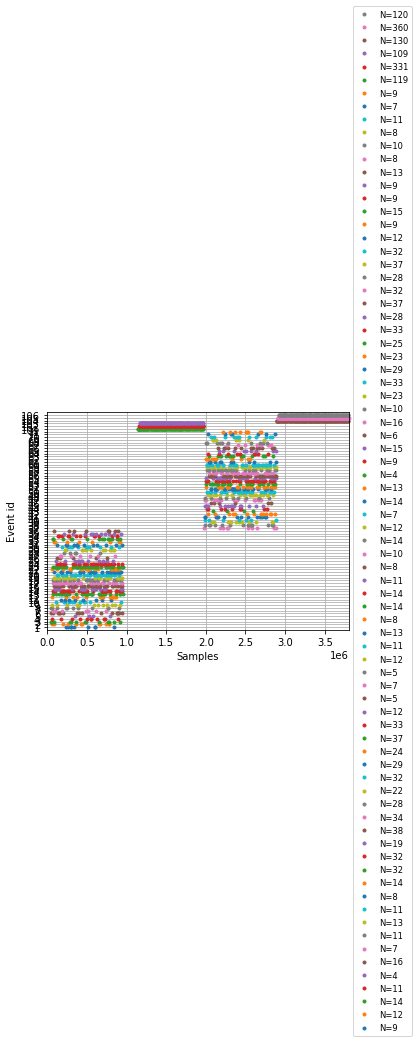

In [43]:
# Todo: Combine some of the 
fig = mne.viz.plot_events(EEG_events[2],event_id=None)

#### Plot EEG
Install dependencies if tool for external window %matplotlib qt doesn't work.

Using matplotlib as 2D backend.


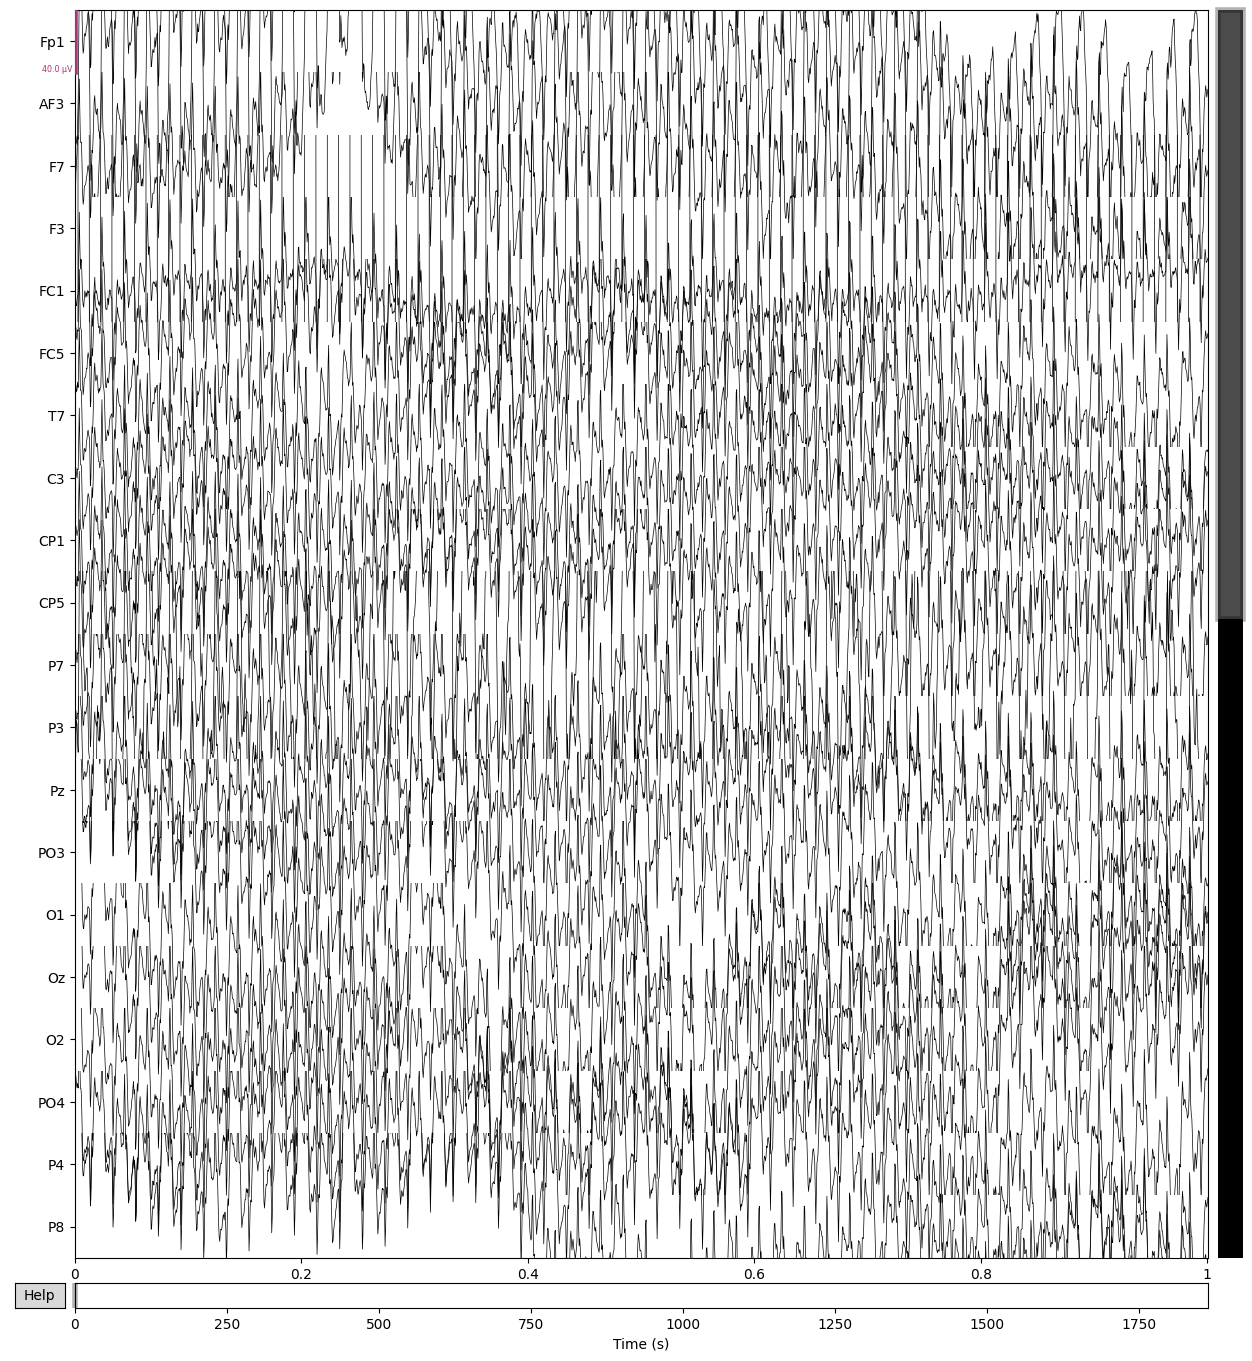

Channels marked as bad: none


In [49]:
index = 2

%matplotlib qt
EEG[index].plot(events = EEG_events[index], duration=1)


In [51]:
EEG_events[5][:20]

array([[58587,     0,     6],
       [60082,     0,     4],
       [61557,     0,    10],
       [63052,     0,     3],
       [64567,     0,     9],
       [65980,     0,    12],
       [67496,     0,     9],
       [69011,     0,     6],
       [70465,     0,     4],
       [71858,     0,     1],
       [73374,     0,    23],
       [74869,     0,    15],
       [76261,     0,    21],
       [77736,     0,    24],
       [79190,     0,    24],
       [80746,     0,    30],
       [82221,     0,     5],
       [83613,     0,    22],
       [85067,     0,    22],
       [86501,     0,    26]])